In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import mne
import mbt_pyspt as mbt
from mbt_pyspt.models.eegdata import EEGData
from mbt_pyspt.modules.preprocessingflow import PreprocessingFlow

In [3]:
path_eo_ec = '../data/em_ca_experiment_slim/1EOEC'
path_ec_eo = '../data/em_ca_experiment_slim/2ECEO'
eo_ec_folders = []
ec_eo_folders = []
eeg_folder = 'eeg_raw'

for directory in os.listdir(path_eo_ec):
    if directory != 'excluded':
        eo_ec_folders.append(directory)
for directory in os.listdir(path_ec_eo):
    if directory != 'excluded':
        ec_eo_folders.append(directory)


266250
266250
1065


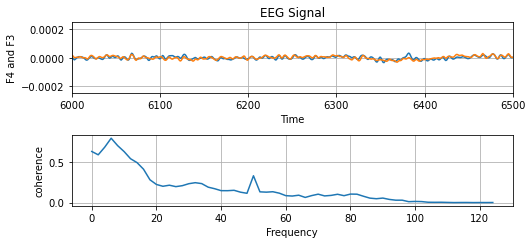

In [58]:
# Playing with Melomind data


with open("../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/2021-07-01_10-24-49.069-Acquisier-melo_1010400041.json", 'r') as json_data:
    dataset = json.load(json_data)
    print(len(dataset['recording']['channelData'][0]))
    print(len(dataset['recording']['statusData']))
    print(len(dataset['recording']['qualities'][0]))
    
    triggers = dataset['recording']['statusData']
    
    dt = 0.004 # sampling interval
    Fs = 1/dt # sampling frequency of 250Hz
    t = np.arange(0, len(dataset['recording']['channelData'][0]))
    F4 = np.array(dataset['recording']['channelData'][0])
    F3 = np.array(dataset['recording']['channelData'][1]) 
    
    plt.rcParams["figure.figsize"] = [15, 7.50]
    fig, axs = plt.subplots(2, 1)
    axs[0].set_title("EEG Signal")
    axs[0].plot(t, F4, t, F3)
    axs[0].set_xlim(6000, 6500)
    axs[0].set_ylim(-0.00025, 0.00025)
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("F4 and F3")
    axs[0].grid(True)
    
    cxy, f = axs[1].cohere(F4, F3, 125, Fs)
    axs[1].set_ylabel('coherence')
    
    fig.tight_layout()
    plt.show()

Creating RawArray with float64 data, n_channels=2, n_times=269250
    Range : 0 ... 269249 =      0.000 ...  1076.996 secs
Ready.
Effective window size : 8.192 (s)


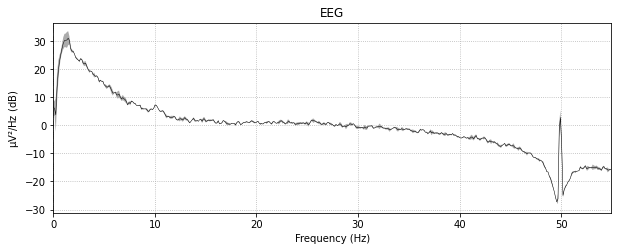

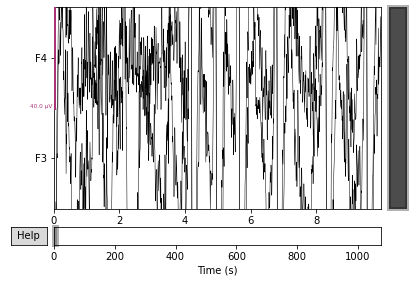

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (6.604 sec)

Effective window size : 8.192 (s)


<ipython-input-54-1afd8573872b>:15: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg_data.mne_data.plot_psd(fmax=30, picks=frontal_channels, spatial_colors=True)


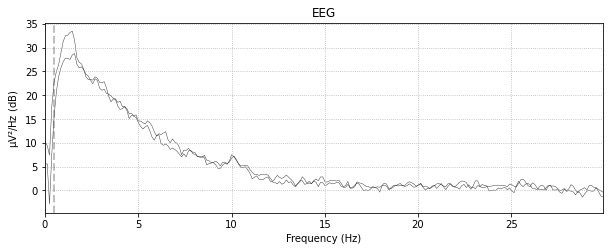

In [54]:

with open("../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/2021-07-01_10-04-55.754-Acquisier-melo_1010400041.json", 'r') as json_data:
    dataset = json.load(json_data)
    channel_data = dataset['recording']['channelData']
    sampling_rate = dataset['header']['sampRate']
    channel_locations = dataset['header']['acquisitionLocation']
    eeg_data = EEGData(channel_data, sampling_rate, channel_locations)
    eeg_data.mne_data.plot_psd(fmax=55, average=True)
    eeg_data.mne_data.plot(n_channels=2)
    
    frontal_channels = ['F4', 'F3']
    freqs = (50, 100)
    eeg_data.mne_data.notch_filter(freqs=freqs)
    #eeg_data.mne_data.resample(sfreq=64)
    eeg_data.mne_data.filter(l_freq=0.5, h_freq=30)
    eeg_data.mne_data.plot_psd(fmax=30, picks=frontal_channels, spatial_colors=True)

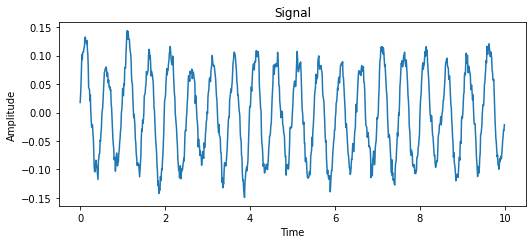

In [31]:
# Just a random signal plotting example

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

np.random.seed(0)

dt = 0.01 # sampling interval
Fs = 1 / dt # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(4 * np.pi * t) + cnse
fig, axs = plt.subplots()
axs.set_title("Signal")
axs.plot(t, s, color='C0')
axs.set_xlabel("Time")
axs.set_ylabel("Amplitude")

plt.show()